# 2D 2-Body Integrator

In [1]:
using Plots
using DataFrames

# plot configs
theme(:dark)

# physical constants
const G_cgs = 6.674E-8

# astro constants
const mass_earth_g = 5.972E27
const radius_earth_cm = 6.371E8 
const mass_sun_g = 1.988E33
const radius_sun_cm = 6.957E10
const AU_cm = 1.496E13
const year_s = 3.154E7

┌ Info: Recompiling stale cache file /Users/mango/.julia/compiled/v1.1/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/mango/.julia/compiled/v1.1/DataFrames/AR9oZ.ji for DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1184


3.154e7

In [25]:
# calculates length of vector
function norm(v)
    return sqrt(sum(v.^2))
end
    
# calculated time derivatives (velocity, acceleration)
function deriv(u_old::Vector{Float64})
    pos = [0, 0] - u_old[1:2]
    dist = norm(pos)
    vel = u_old[3:4]
    acc = (G_cgs * mass_sun_g / dist^3) * pos
    
    D = Vector{Float64}(undef, 4) # holds u_old derivatives
    D[1:2] = vel
    D[3:4] = acc
    return D
end

# integrator
function rk4(u_old::Vector{Float64}, dt)
    K1 = deriv(u_old)
    K2 = deriv(u_old + K1*dt/2)
    K3 = deriv(u_old + K2*dt/2)
    K4 = deriv(u_old + K3*dt)
    u_new = u_old + (dt/6)*(K1 + 2*(K2 + K3) + K4)
end

rk4 (generic function with 1 method)

In [26]:
# initial conditions
v_circ = sqrt(G_cgs * mass_sun_g / AU_cm)
earth = [AU_cm, 0.0, 0.0, v_circ]
sun = [0.0, 0.0, 0.0, 0.0]

df = DataFrame(x=earth[1], y=earth[2], vx=earth[3], vy=earth[4])

dt = year_s / 1200
T = year_s
earth_old = earth
for t in 0:dt:T
    earth_new = rk4(earth_old, dt)
    push!(df, earth_new)
    earth_old = earth_new
end

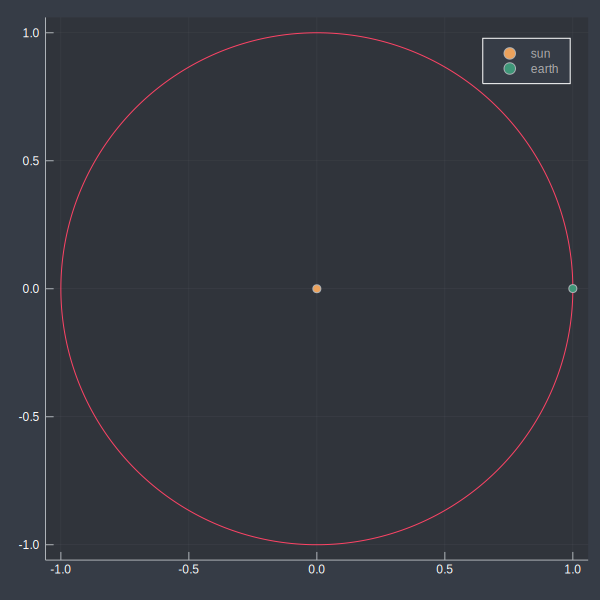

In [68]:
plot(df[:x]/AU_cm, df[:y]/AU_cm, aspect_ratio=:equal, size=(600, 600), label="")
scatter!([0], [0], label="sun")
scatter!([df[:x][end]]/AU_cm, [df[:y][end]]/AU_cm, label="earth")

In [76]:
png("Figures/plot")